# US Census Bureau Demographics (ACS DP03) - Exploratory Data Analysis

**Project:** AI for Equitable Public Transportation - Deloitte Capstone

**Dataset:** American Community Survey (ACS) 1-Year Estimates Data Profile 03 (DP03) - 2023

**Focus:** Florida State-Level Economic Characteristics

---

## Overview

This notebook performs a comprehensive exploratory data analysis on the US Census Bureau's American Community Survey (ACS) Data Profile 03 (DP03), which contains **Selected Economic Characteristics** for the state of Florida.

### Key Data Categories:
1. **Employment Status** - Labor force participation, unemployment rates
2. **Commuting to Work** - Transportation modes including public transit usage
3. **Occupation** - Job categories and distribution
4. **Industry** - Employment by industry sector
5. **Class of Worker** - Private, government, self-employed
6. **Income and Benefits** - Household and family income distributions
7. **Health Insurance Coverage** - Insurance status by employment
8. **Poverty Status** - Poverty rates by family type and demographics

### Relevance to Transit Equity:
This demographic data is critical for understanding:
- **Who relies on public transit** (commuting patterns, income levels)
- **Economic barriers** to transportation access
- **Underserved populations** that may benefit from improved transit
- **Geographic targeting** for equity-focused transit improvements

## 1. Setup and Data Loading

In [ ]:
# Install required packages (if needed)
!pip install -q pandas numpy matplotlib seaborn plotly

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [ ]:
# Load the ACS DP03 dataset
# Update this path if your file is in a different location
file_path = 'ACSDP1Y2023.DP03-2026-01-28T235841.csv'

# Try multiple potential locations
import os
from pathlib import Path

potential_paths = [
    file_path,
    f'/content/{file_path}',
    f'/content/drive/MyDrive/{file_path}',
]

df_raw = None
for path in potential_paths:
    if os.path.exists(path):
        df_raw = pd.read_csv(path, encoding='utf-8')
        print(f"Loaded data from: {path}")
        break

if df_raw is None:
    print("Please upload the ACS CSV file to Colab.")
    from google.colab import files
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    df_raw = pd.read_csv(file_name, encoding='utf-8')

print(f"\nDataset shape: {df_raw.shape}")
print(f"Columns: {df_raw.columns.tolist()}")

Please upload the ACS CSV file to Colab.


Saving ACSDP1Y2023.DP03-2026-02-11T185725.csv to ACSDP1Y2023.DP03-2026-02-11T185725.csv

Dataset shape: (145, 5)
Columns: ['Label (Grouping)', 'Florida!!Estimate', 'Florida!!Margin of Error', 'Florida!!Percent', 'Florida!!Percent Margin of Error']


## 2. Data Structure Exploration

In [ ]:
# Display first 20 rows to understand structure
print("=" * 80)
print("RAW DATA PREVIEW (First 20 rows)")
print("=" * 80)
df_raw.head(20)

RAW DATA PREVIEW (First 20 rows)


,Label (Grouping),Florida!!Estimate,Florida!!Margin of Error,Florida!!Percent,Florida!!Percent Margin of Error
0,EMPLOYMENT STATUS,NaN,NaN,NaN,NaN
1,Population 16 years and over,"18,768,460","±9,654","18,768,460",(X)
2,In labor force,"11,267,928","±39,857",60.0%,±0.2
3,Civilian labor force,"11,191,144","±40,194",59.6%,±0.2
4,Employed,"10,731,195","±41,924",57.2%,±0.2
5,Unemployed,"459,949","±16,198",2.5%,±0.1
6,Armed Forces,"76,784","±5,676",0.4%,±0.1
7,Not in labor force,"7,500,532","±40,565",40.0%,±0.2
8,Civilian labor force,"11,191,144","±40,194","11,191,144",(X)
9,Unemployment Rate,(X),(X),4.1%,±0.1


In [ ]:
# Understand the hierarchical structure
print("=" * 80)
print("DATA STRUCTURE ANALYSIS")
print("=" * 80)

# Rename columns for easier handling
df = df_raw.copy()
df.columns = ['Label', 'Estimate', 'Margin_of_Error', 'Percent', 'Percent_MOE']

print(f"\nTotal rows: {len(df)}")
print(f"\nColumn names: {df.columns.tolist()}")

# Identify section headers (rows with empty values)
section_headers = df[df['Estimate'].isna()]['Label'].tolist()
print(f"\nSection Headers (Main Categories):")
for i, header in enumerate(section_headers, 1):
    print(f"  {i}. {header}")

DATA STRUCTURE ANALYSIS

Total rows: 145

Column names: ['Label', 'Estimate', 'Margin_of_Error', 'Percent', 'Percent_MOE']

Section Headers (Main Categories):
  1. EMPLOYMENT STATUS
  2. COMMUTING TO WORK
  3. OCCUPATION
  4. INDUSTRY
  5. CLASS OF WORKER
  6. INCOME AND BENEFITS (IN 2023 INFLATION-ADJUSTED DOLLARS)
  7. HEALTH INSURANCE COVERAGE
  8. PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL


In [ ]:
# Data type analysis
print("=" * 80)
print("DATA TYPE ANALYSIS")
print("=" * 80)

print("\nOriginal data types:")
print(df.dtypes)

print("\nSample values from each column:")
for col in df.columns:
    print(f"\n{col}:")
    print(f"  Sample values: {df[col].dropna().head(5).tolist()}")

DATA TYPE ANALYSIS

Original data types:
Label              object
Estimate           object
Margin_of_Error    object
Percent            object
Percent_MOE        object
dtype: object

Sample values from each column:

Label:
  Sample values: ['EMPLOYMENT STATUS', '\xa0\xa0\xa0\xa0Population 16 years and over', '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0In labor force', '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Civilian labor force', '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Employed']

Estimate:
  Sample values: ['18,768,460', '11,267,928', '11,191,144', '10,731,195', '459,949']

Margin_of_Error:
  Sample values: ['±9,654', '±39,857', '±40,194', '±41,924', '±16,198']

Percent:
  Sample values: ['18,768,460', '60.0%', '59.6%', '57.2%', '2.5%']

Percent_MOE:
  Sample values: ['(X)', '±0.2', '±0.2', '±0.2', '±0.1']


## 3. Data Cleaning and Transformation

In [ ]:
def parse_numeric(value):
    """Parse numeric values from Census format strings."""
    if pd.isna(value):
        return np.nan

    text = str(value).strip()

    # Handle special Census codes
    if text in ['(X)', 'X', '', 'nan', 'None', '-', 'N']:
        return np.nan

    # Remove commas, percentage signs, and margin of error symbols
    text = text.replace(',', '').replace('%', '').replace('±', '').strip()

    try:
        return float(text)
    except ValueError:
        return np.nan

def clean_label(label):
    """Clean and normalize label text."""
    if pd.isna(label):
        return ''
    # Replace non-breaking spaces and normalize whitespace
    text = str(label).replace('\u00a0', ' ')
    text = ' '.join(text.split())
    return text.strip()

def get_indent_level(label):
    """Determine hierarchy level based on indentation."""
    if pd.isna(label):
        return 0
    original = str(label)
    stripped = original.lstrip()
    # Count leading spaces (approximately 4 spaces per level)
    spaces = len(original) - len(stripped)
    return spaces // 4

# Apply cleaning functions
df_clean = df.copy()

# Store original label for hierarchy detection
df_clean['Indent_Level'] = df['Label'].apply(get_indent_level)
df_clean['Label_Clean'] = df['Label'].apply(clean_label)

# Parse numeric columns
df_clean['Estimate_Num'] = df['Estimate'].apply(parse_numeric)
df_clean['MOE_Num'] = df['Margin_of_Error'].apply(parse_numeric)
df_clean['Percent_Num'] = df['Percent'].apply(parse_numeric)
df_clean['Percent_MOE_Num'] = df['Percent_MOE'].apply(parse_numeric)

print("Data cleaning complete!")
print(f"\nCleaned dataset shape: {df_clean.shape}")
df_clean.head(20)

Data cleaning complete!

Cleaned dataset shape: (145, 11)


,Label,Estimate,Margin_of_Error,Percent,Percent_MOE,Indent_Level,Label_Clean,Estimate_Num,MOE_Num,Percent_Num,Percent_MOE_Num
0,EMPLOYMENT STATUS,NaN,NaN,NaN,NaN,0,EMPLOYMENT STATUS,NaN,NaN,NaN,NaN
1,Population 16 years and over,"18,768,460","±9,654","18,768,460",(X),1,Population 16 years and over,18768460.0,9654.0,18768460.0,NaN
2,In labor force,"11,267,928","±39,857",60.0%,±0.2,2,In labor force,11267928.0,39857.0,60.0,0.2
3,Civilian labor force,"11,191,144","±40,194",59.6%,±0.2,3,Civilian labor force,11191144.0,40194.0,59.6,0.2
4,Employed,"10,731,195","±41,924",57.2%,±0.2,4,Employed,10731195.0,41924.0,57.2,0.2
5,Unemployed,"459,949","±16,198",2.5%,±0.1,4,Unemployed,459949.0,16198.0,2.5,0.1
6,Armed Forces,"76,784","±5,676",0.4%,±0.1,3,Armed Forces,76784.0,5676.0,0.4,0.1
7,Not in labor force,"7,500,532","±40,565",40.0%,±0.2,2,Not in labor force,7500532.0,40565.0,40.0,0.2
8,Civilian labor force,"11,191,144","±40,194","11,191,144",(X),1,Civilian labor force,11191144.0,40194.0,11191144.0,NaN
9,Unemployment Rate,(X),(X),4.1%,±0.1,2,Unemployment Rate,NaN,NaN,4.1,0.1


In [ ]:
# Assign category labels based on section headers
categories = [
    'EMPLOYMENT STATUS',
    'COMMUTING TO WORK',
    'OCCUPATION',
    'INDUSTRY',
    'CLASS OF WORKER',
    'INCOME AND BENEFITS (IN 2023 INFLATION-ADJUSTED DOLLARS)',
    'HEALTH INSURANCE COVERAGE',
    'PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL'
]

# Create category column
df_clean['Category'] = np.nan
current_category = None

for idx, row in df_clean.iterrows():
    label = row['Label_Clean']
    if label in categories:
        current_category = label
    df_clean.at[idx, 'Category'] = current_category

print("Categories assigned:")
print(df_clean['Category'].value_counts())

Categories assigned:
Category
INCOME AND BENEFITS (IN 2023 INFLATION-ADJUSTED DOLLARS)                                           45
HEALTH INSURANCE COVERAGE                                                                          25
PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL    20
EMPLOYMENT STATUS                                                                                  18
INDUSTRY                                                                                           15
COMMUTING TO WORK                                                                                   9
OCCUPATION                                                                                          7
CLASS OF WORKER                                                                                     6
Name: count, dtype: int64


## 4. Statistical Summary by Category

In [ ]:
# Create summary statistics for each category
print("=" * 80)
print("STATISTICAL SUMMARY BY CATEGORY")
print("=" * 80)

for category in df_clean['Category'].dropna().unique():
    print(f"\n{'='*80}")
    print(f"CATEGORY: {category}")
    print(f"{'='*80}")

    subset = df_clean[df_clean['Category'] == category]
    print(f"Number of metrics: {len(subset)}")

    # Show key metrics
    key_metrics = subset[subset['Indent_Level'] <= 1][['Label_Clean', 'Estimate', 'Percent']]
    if len(key_metrics) > 0:
        print("\nKey Metrics:")
        display(key_metrics)

STATISTICAL SUMMARY BY CATEGORY

CATEGORY: EMPLOYMENT STATUS
Number of metrics: 18

Key Metrics:


,Label_Clean,Estimate,Percent
0,EMPLOYMENT STATUS,NaN,NaN
1,Population 16 years and over,"18,768,460","18,768,460"
8,Civilian labor force,"11,191,144","11,191,144"
10,Females 16 years and over,"9,628,103","9,628,103"
14,Own children of the householder under 6 years,"1,295,758","1,295,758"
16,Own children of the householder 6 to 17 years,"2,850,348","2,850,348"



CATEGORY: COMMUTING TO WORK
Number of metrics: 9

Key Metrics:


,Label_Clean,Estimate,Percent
18,COMMUTING TO WORK,NaN,NaN
19,Workers 16 years and over,"10,619,674","10,619,674"



CATEGORY: OCCUPATION
Number of metrics: 7

Key Metrics:


,Label_Clean,Estimate,Percent
27,OCCUPATION,NaN,NaN
28,Civilian employed population 16 years and over,"10,731,195","10,731,195"



CATEGORY: INDUSTRY
Number of metrics: 15

Key Metrics:


,Label_Clean,Estimate,Percent
34,INDUSTRY,NaN,NaN
35,Civilian employed population 16 years and over,"10,731,195","10,731,195"



CATEGORY: CLASS OF WORKER
Number of metrics: 6

Key Metrics:


,Label_Clean,Estimate,Percent
49,CLASS OF WORKER,NaN,NaN
50,Civilian employed population 16 years and over,"10,731,195","10,731,195"



CATEGORY: INCOME AND BENEFITS (IN 2023 INFLATION-ADJUSTED DOLLARS)
Number of metrics: 45

Key Metrics:


,Label_Clean,Estimate,Percent
55,INCOME AND BENEFITS (IN 2023 INFLATION-ADJUSTE...,NaN,NaN
56,Total households,"8,966,402","8,966,402"
80,Families,"5,802,895","5,802,895"
93,Per capita income (dollars),"41,902",(X)
94,Nonfamily households,"3,163,507","3,163,507"
97,Median earnings for workers (dollars),"41,459",(X)
98,"Median earnings for male full-time, year-round...","56,557",(X)
99,"Median earnings for female full-time, year-rou...","48,034",(X)



CATEGORY: HEALTH INSURANCE COVERAGE
Number of metrics: 25

Key Metrics:


,Label_Clean,Estimate,Percent
100,HEALTH INSURANCE COVERAGE,NaN,NaN
101,Civilian noninstitutionalized population,"22,276,397","22,276,397"
106,Civilian noninstitutionalized population under...,"4,647,684","4,647,684"
108,Civilian noninstitutionalized population 19 to...,"12,813,163","12,813,163"



CATEGORY: PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL
Number of metrics: 20

Key Metrics:


,Label_Clean,Estimate,Percent
125,PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME...,NaN,NaN
126,All families,(X),8.6%
135,All people,(X),12.3%


## 5. Employment Analysis

In [ ]:
# Extract employment data
employment_data = df_clean[df_clean['Category'] == 'EMPLOYMENT STATUS'].copy()

print("=" * 80)
print("EMPLOYMENT STATUS ANALYSIS - FLORIDA 2023")
print("=" * 80)

# Key employment metrics
employment_metrics = {
    'Population 16+ years': employment_data[employment_data['Label_Clean'] == 'Population 16 years and over']['Estimate_Num'].values[0] if len(employment_data[employment_data['Label_Clean'] == 'Population 16 years and over']) > 0 else np.nan,
    'In Labor Force': employment_data[employment_data['Label_Clean'] == 'In labor force']['Percent_Num'].values[0] if len(employment_data[employment_data['Label_Clean'] == 'In labor force']) > 0 else np.nan,
    'Employed': employment_data[employment_data['Label_Clean'] == 'Employed']['Percent_Num'].values[0] if len(employment_data[employment_data['Label_Clean'] == 'Employed']) > 0 else np.nan,
    'Unemployed': employment_data[employment_data['Label_Clean'] == 'Unemployed']['Percent_Num'].values[0] if len(employment_data[employment_data['Label_Clean'] == 'Unemployed']) > 0 else np.nan,
}

print("\nKey Employment Indicators:")
for metric, value in employment_metrics.items():
    if not np.isnan(value):
        if metric == 'Population 16+ years':
            print(f"  {metric}: {value:,.0f}")
        else:
            print(f"  {metric}: {value:.1f}%")

EMPLOYMENT STATUS ANALYSIS - FLORIDA 2023

Key Employment Indicators:
  Population 16+ years: 18,768,460
  In Labor Force: 60.0%
  Employed: 57.2%
  Unemployed: 2.5%


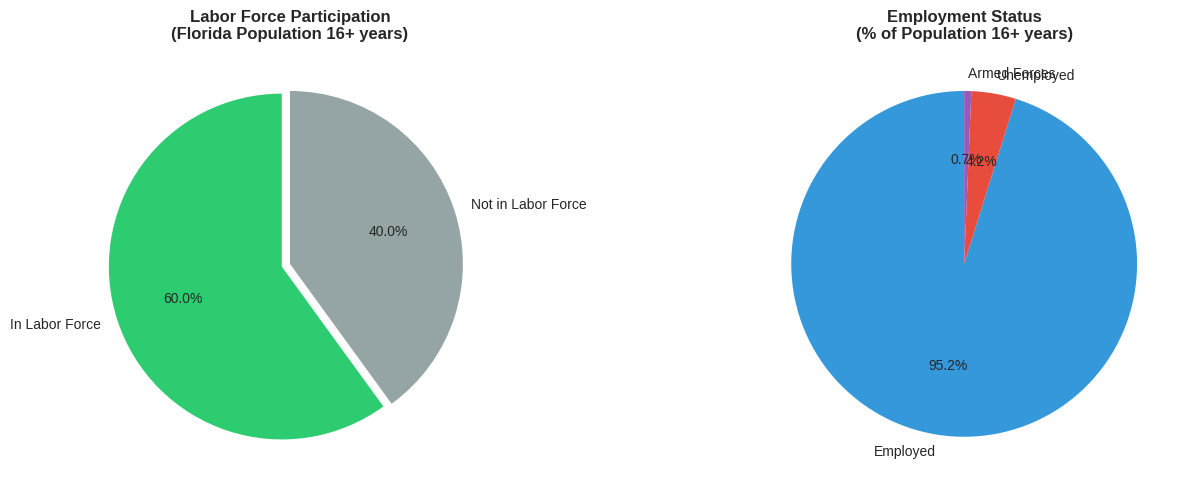


Key Finding: Florida has a 60% labor force participation rate with 4.1% unemployment rate.


In [ ]:
# Employment Status Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Labor Force Participation
labor_force_data = {
    'In Labor Force': 60.0,
    'Not in Labor Force': 40.0
}
colors = ['#2ecc71', '#95a5a6']
axes[0].pie(labor_force_data.values(), labels=labor_force_data.keys(), autopct='%1.1f%%',
            colors=colors, startangle=90, explode=(0.05, 0))
axes[0].set_title('Labor Force Participation\n(Florida Population 16+ years)', fontsize=12, fontweight='bold')

# Employment Status within Labor Force
employment_status = {
    'Employed': 57.2,
    'Unemployed': 2.5,
    'Armed Forces': 0.4
}
colors2 = ['#3498db', '#e74c3c', '#9b59b6']
axes[1].pie(employment_status.values(), labels=employment_status.keys(), autopct='%1.1f%%',
            colors=colors2, startangle=90)
axes[1].set_title('Employment Status\n(% of Population 16+ years)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('employment_status.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nKey Finding: Florida has a 60% labor force participation rate with 4.1% unemployment rate.")

## 6. Commuting Analysis (Critical for Transit Equity)

In [ ]:
# Extract commuting data
commuting_data = df_clean[df_clean['Category'] == 'COMMUTING TO WORK'].copy()

print("=" * 80)
print("COMMUTING TO WORK ANALYSIS - FLORIDA 2023")
print("=" * 80)

# Transportation mode data
transport_modes = {
    'Drove Alone': 69.1,
    'Carpooled': 9.7,
    'Public Transit': 1.4,
    'Walked': 1.5,
    'Other Means': 2.5,
    'Worked from Home': 15.8
}

print("\nTransportation Mode Distribution (% of Workers):")
for mode, pct in transport_modes.items():
    print(f"  {mode}: {pct}%")

print(f"\nMean Travel Time to Work: 28.5 minutes")
print(f"Total Workers 16+ years: 10,619,674")

COMMUTING TO WORK ANALYSIS - FLORIDA 2023

Transportation Mode Distribution (% of Workers):
  Drove Alone: 69.1%
  Carpooled: 9.7%
  Public Transit: 1.4%
  Walked: 1.5%
  Other Means: 2.5%
  Worked from Home: 15.8%

Mean Travel Time to Work: 28.5 minutes
Total Workers 16+ years: 10,619,674


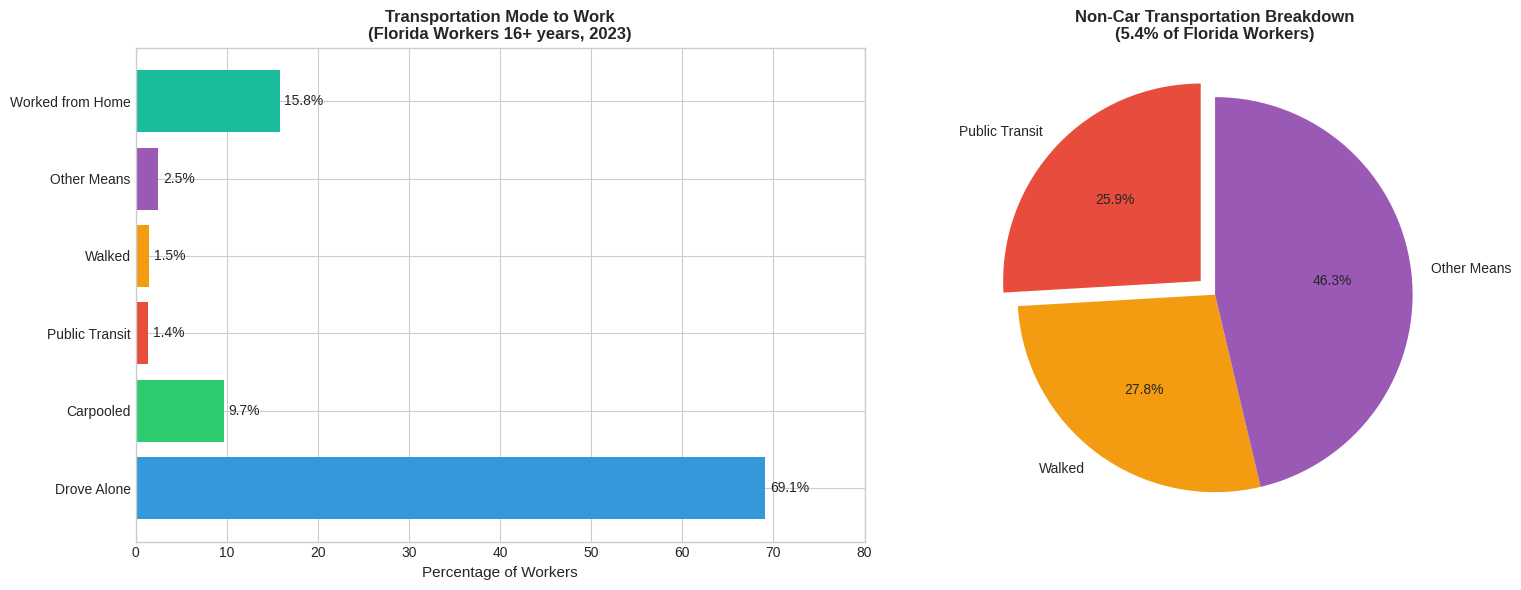


KEY TRANSIT EQUITY INSIGHT

PUBLIC TRANSIT USAGE IS CRITICALLY LOW AT 1.4%

This represents approximately 143,998 workers who rely on public transit.
Combined with those who walk (1.5%) and use other means (2.5%), only 5.4%
of Florida workers use non-car transportation modes.

This indicates significant potential for:
1. Transit expansion to underserved areas
2. Improved service to increase ridership
3. Equity-focused investments to serve transit-dependent populations



In [ ]:
# Commuting Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Transportation Mode Distribution (Bar Chart)
modes = list(transport_modes.keys())
percentages = list(transport_modes.values())

colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6', '#1abc9c']
bars = axes[0].barh(modes, percentages, color=colors)
axes[0].set_xlabel('Percentage of Workers', fontsize=11)
axes[0].set_title('Transportation Mode to Work\n(Florida Workers 16+ years, 2023)', fontsize=12, fontweight='bold')

# Add value labels
for bar, pct in zip(bars, percentages):
    axes[0].text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                 f'{pct}%', va='center', fontsize=10)

axes[0].set_xlim(0, 80)

# Pie Chart for Non-Car Transportation (Transit Equity Focus)
non_car_modes = {
    'Public Transit': 1.4,
    'Walked': 1.5,
    'Other Means': 2.5
}
non_car_colors = ['#e74c3c', '#f39c12', '#9b59b6']
axes[1].pie(non_car_modes.values(), labels=non_car_modes.keys(), autopct='%1.1f%%',
            colors=non_car_colors, startangle=90, explode=(0.1, 0, 0))
axes[1].set_title('Non-Car Transportation Breakdown\n(5.4% of Florida Workers)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('commuting_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "="*80)
print("KEY TRANSIT EQUITY INSIGHT")
print("="*80)
print("""
PUBLIC TRANSIT USAGE IS CRITICALLY LOW AT 1.4%

This represents approximately 143,998 workers who rely on public transit.
Combined with those who walk (1.5%) and use other means (2.5%), only 5.4%
of Florida workers use non-car transportation modes.

This indicates significant potential for:
1. Transit expansion to underserved areas
2. Improved service to increase ridership
3. Equity-focused investments to serve transit-dependent populations
""")

## 7. Income Distribution Analysis

In [ ]:
# Extract income data
income_data = df_clean[df_clean['Category'] == 'INCOME AND BENEFITS (IN 2023 INFLATION-ADJUSTED DOLLARS)'].copy()

print("=" * 80)
print("INCOME AND BENEFITS ANALYSIS - FLORIDA 2023")
print("=" * 80)

# Household income distribution
income_brackets = {
    'Less than $10,000': 5.4,
    '$10,000 - $14,999': 3.3,
    '$15,000 - $24,999': 6.4,
    '$25,000 - $34,999': 7.4,
    '$35,000 - $49,999': 11.2,
    '$50,000 - $74,999': 17.4,
    '$75,000 - $99,999': 13.2,
    '$100,000 - $149,999': 17.2,
    '$150,000 - $199,999': 8.0,
    '$200,000 or more': 10.6
}

print("\nHousehold Income Distribution:")
for bracket, pct in income_brackets.items():
    print(f"  {bracket}: {pct}%")

print("\nKey Income Statistics:")
print(f"  Total Households: 8,966,402")
print(f"  Median Household Income: $73,311")
print(f"  Mean Household Income: $103,634")
print(f"  Per Capita Income: $41,902")

INCOME AND BENEFITS ANALYSIS - FLORIDA 2023

Household Income Distribution:
  Less than $10,000: 5.4%
  $10,000 - $14,999: 3.3%
  $15,000 - $24,999: 6.4%
  $25,000 - $34,999: 7.4%
  $35,000 - $49,999: 11.2%
  $50,000 - $74,999: 17.4%
  $75,000 - $99,999: 13.2%
  $100,000 - $149,999: 17.2%
  $150,000 - $199,999: 8.0%
  $200,000 or more: 10.6%

Key Income Statistics:
  Total Households: 8,966,402
  Median Household Income: $73,311
  Mean Household Income: $103,634
  Per Capita Income: $41,902


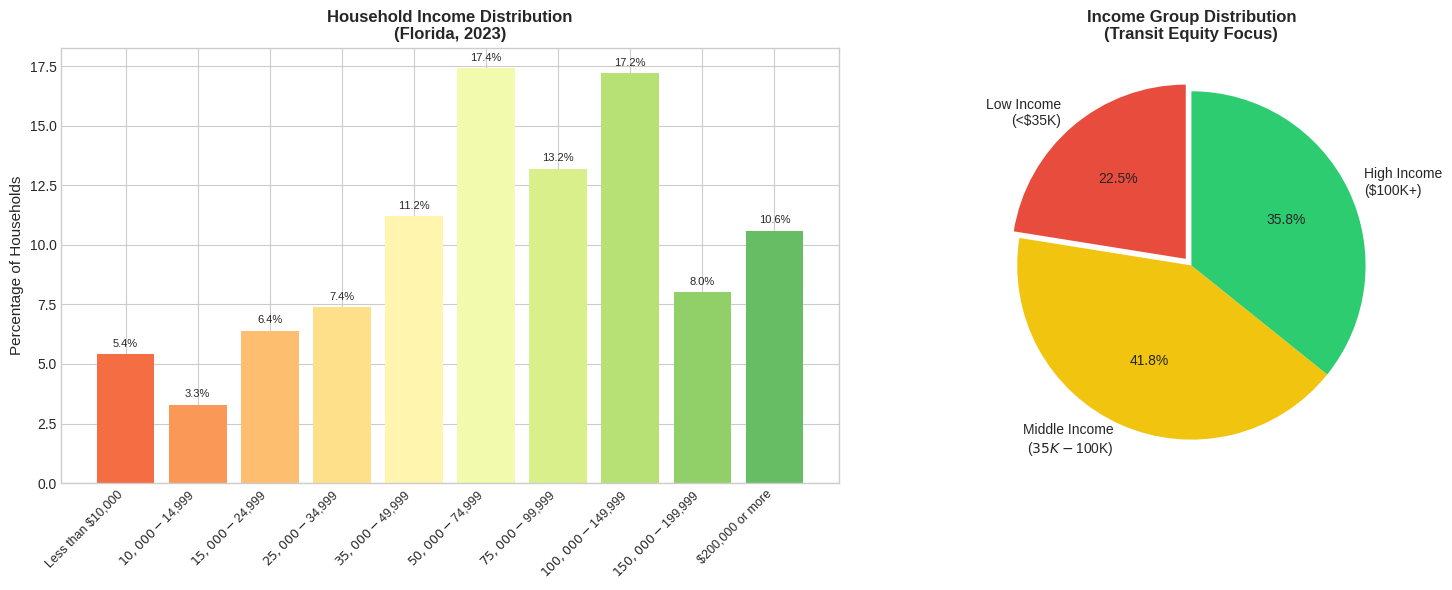


Low Income Households (<$35K): 22.5% (2,017,440 households)
These households are more likely to be transit-dependent and face transportation barriers.


In [ ]:
# Income Distribution Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Household Income Distribution (Bar Chart)
brackets = list(income_brackets.keys())
percentages = list(income_brackets.values())

# Color gradient from red (low income) to green (high income)
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(brackets)))

bars = axes[0].bar(range(len(brackets)), percentages, color=colors)
axes[0].set_xticks(range(len(brackets)))
axes[0].set_xticklabels(brackets, rotation=45, ha='right', fontsize=9)
axes[0].set_ylabel('Percentage of Households', fontsize=11)
axes[0].set_title('Household Income Distribution\n(Florida, 2023)', fontsize=12, fontweight='bold')

# Add value labels
for bar, pct in zip(bars, percentages):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
                 f'{pct}%', ha='center', fontsize=8)

# Low Income vs Higher Income Comparison (Transit Equity Focus)
low_income = sum([5.4, 3.3, 6.4, 7.4])  # Under $35,000
middle_income = sum([11.2, 17.4, 13.2])  # $35,000 - $99,999
high_income = sum([17.2, 8.0, 10.6])  # $100,000+

income_groups = ['Low Income\n(<$35K)', 'Middle Income\n($35K-$100K)', 'High Income\n($100K+)']
income_pcts = [low_income, middle_income, high_income]
colors2 = ['#e74c3c', '#f1c40f', '#2ecc71']

wedges, texts, autotexts = axes[1].pie(income_pcts, labels=income_groups, autopct='%1.1f%%',
                                        colors=colors2, startangle=90, explode=(0.05, 0, 0))
axes[1].set_title('Income Group Distribution\n(Transit Equity Focus)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('income_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nLow Income Households (<$35K): {low_income:.1f}% ({int(8966402 * low_income / 100):,} households)")
print("These households are more likely to be transit-dependent and face transportation barriers.")

## 8. Public Assistance and Poverty Analysis

In [ ]:
# Public Assistance Data
print("=" * 80)
print("PUBLIC ASSISTANCE INDICATORS - FLORIDA 2023")
print("=" * 80)

assistance_data = {
    'With Social Security': 36.7,
    'With Retirement Income': 25.9,
    'With Supplemental Security Income (SSI)': 4.9,
    'With Cash Public Assistance': 1.9,
    'With SNAP Benefits': 11.9
}

print("\nHouseholds Receiving Assistance (% of Total Households):")
for program, pct in assistance_data.items():
    count = int(8966402 * pct / 100)
    print(f"  {program}: {pct}% ({count:,} households)")

PUBLIC ASSISTANCE INDICATORS - FLORIDA 2023

Households Receiving Assistance (% of Total Households):
  With Social Security: 36.7% (3,290,669 households)
  With Retirement Income: 25.9% (2,322,298 households)
  With Supplemental Security Income (SSI): 4.9% (439,353 households)
  With Cash Public Assistance: 1.9% (170,361 households)
  With SNAP Benefits: 11.9% (1,067,001 households)


In [ ]:
# Poverty Analysis
print("\n" + "=" * 80)
print("POVERTY STATUS ANALYSIS - FLORIDA 2023")
print("=" * 80)

poverty_data = {
    'All Families': 8.6,
    'Families with Children Under 18': 13.3,
    'Married Couple Families': 5.5,
    'Female Householder (No Spouse)': 19.4,
    'Female Householder with Children': 28.1,
    'All People': 12.3,
    'Children Under 18': 15.7,
    'Adults 18-64': 11.3,
    'Seniors 65+': 12.1
}

print("\nPoverty Rates by Demographic:")
for group, rate in poverty_data.items():
    print(f"  {group}: {rate}%")


POVERTY STATUS ANALYSIS - FLORIDA 2023

Poverty Rates by Demographic:
  All Families: 8.6%
  Families with Children Under 18: 13.3%
  Married Couple Families: 5.5%
  Female Householder (No Spouse): 19.4%
  Female Householder with Children: 28.1%
  All People: 12.3%
  Children Under 18: 15.7%
  Adults 18-64: 11.3%
  Seniors 65+: 12.1%


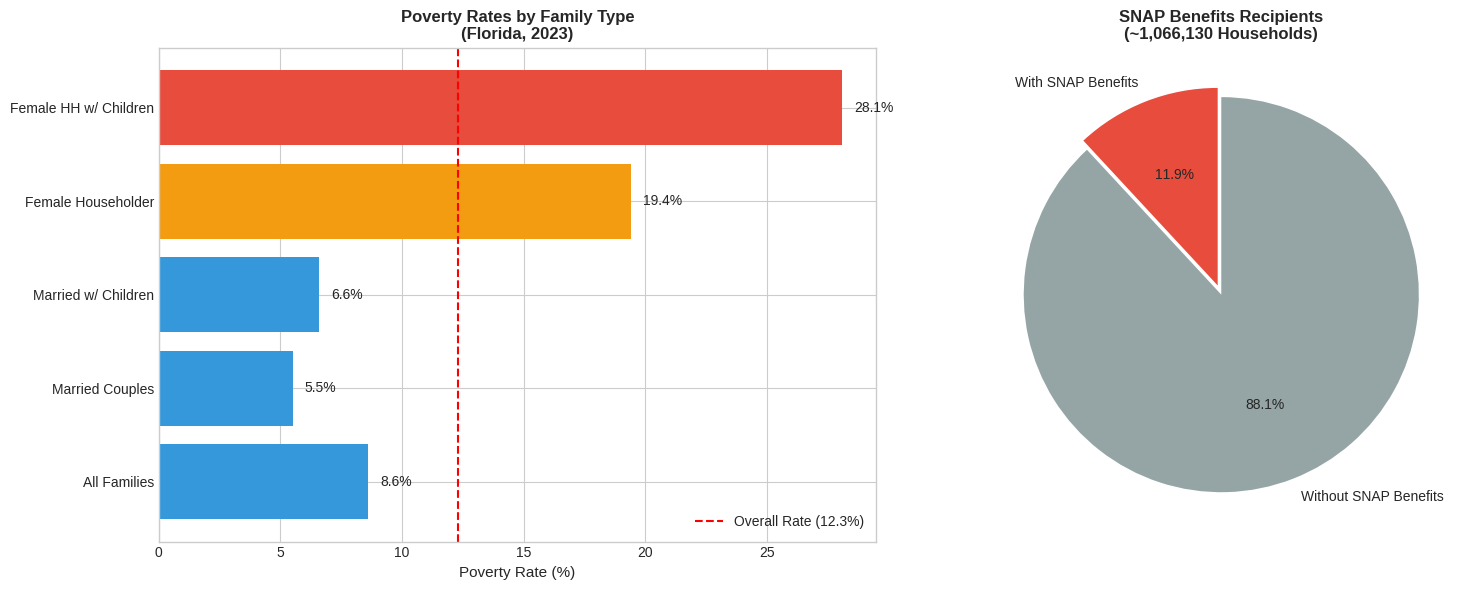


KEY EQUITY INSIGHT

VULNERABLE POPULATIONS REQUIRING TRANSIT ACCESS:

1. Female-headed households with children have 28.1% poverty rate
   - These families often lack vehicle access and depend on transit

2. Over 1 million households (11.9%) receive SNAP benefits
   - Indicator of low-income, transit-dependent population

3. 12.3% of all Floridians live in poverty
   - Approximately 2.74 million people



In [ ]:
# Poverty and Assistance Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Poverty Rates by Family Type
family_poverty = {
    'All Families': 8.6,
    'Married Couples': 5.5,
    'Married w/ Children': 6.6,
    'Female Householder': 19.4,
    'Female HH w/ Children': 28.1
}

families = list(family_poverty.keys())
rates = list(family_poverty.values())

colors = ['#3498db' if r < 10 else '#f39c12' if r < 20 else '#e74c3c' for r in rates]
bars = axes[0].barh(families, rates, color=colors)
axes[0].set_xlabel('Poverty Rate (%)', fontsize=11)
axes[0].set_title('Poverty Rates by Family Type\n(Florida, 2023)', fontsize=12, fontweight='bold')
axes[0].axvline(x=12.3, color='red', linestyle='--', label='Overall Rate (12.3%)')
axes[0].legend()

# Add value labels
for bar, rate in zip(bars, rates):
    axes[0].text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                 f'{rate}%', va='center', fontsize=10)

# SNAP Benefits - Transit Equity Indicator
snap_data = {
    'With SNAP Benefits': 11.9,
    'Without SNAP Benefits': 88.1
}
colors2 = ['#e74c3c', '#95a5a6']
axes[1].pie(snap_data.values(), labels=snap_data.keys(), autopct='%1.1f%%',
            colors=colors2, startangle=90, explode=(0.05, 0))
axes[1].set_title('SNAP Benefits Recipients\n(~1,066,130 Households)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('poverty_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "="*80)
print("KEY EQUITY INSIGHT")
print("="*80)
print("""
VULNERABLE POPULATIONS REQUIRING TRANSIT ACCESS:

1. Female-headed households with children have 28.1% poverty rate
   - These families often lack vehicle access and depend on transit

2. Over 1 million households (11.9%) receive SNAP benefits
   - Indicator of low-income, transit-dependent population

3. 12.3% of all Floridians live in poverty
   - Approximately 2.74 million people
""")

## 9. Health Insurance and Employment

In [ ]:
# Health Insurance Analysis
print("=" * 80)
print("HEALTH INSURANCE COVERAGE - FLORIDA 2023")
print("=" * 80)

insurance_data = {
    'Total Population (Civilian Noninstitutionalized)': 22276397,
    'With Health Insurance': 89.3,
    'With Private Insurance': 64.2,
    'With Public Coverage': 37.5,
    'No Health Insurance': 10.7,
    'Uninsured Children (<19)': 7.5,
    'Uninsured Employed (19-64)': 14.0,
    'Uninsured Unemployed': 31.3
}

print("\nHealth Insurance Coverage:")
for metric, value in insurance_data.items():
    if metric == 'Total Population (Civilian Noninstitutionalized)':
        print(f"  {metric}: {value:,}")
    else:
        print(f"  {metric}: {value}%")

HEALTH INSURANCE COVERAGE - FLORIDA 2023

Health Insurance Coverage:
  Total Population (Civilian Noninstitutionalized): 22,276,397
  With Health Insurance: 89.3%
  With Private Insurance: 64.2%
  With Public Coverage: 37.5%
  No Health Insurance: 10.7%
  Uninsured Children (<19): 7.5%
  Uninsured Employed (19-64): 14.0%
  Uninsured Unemployed: 31.3%


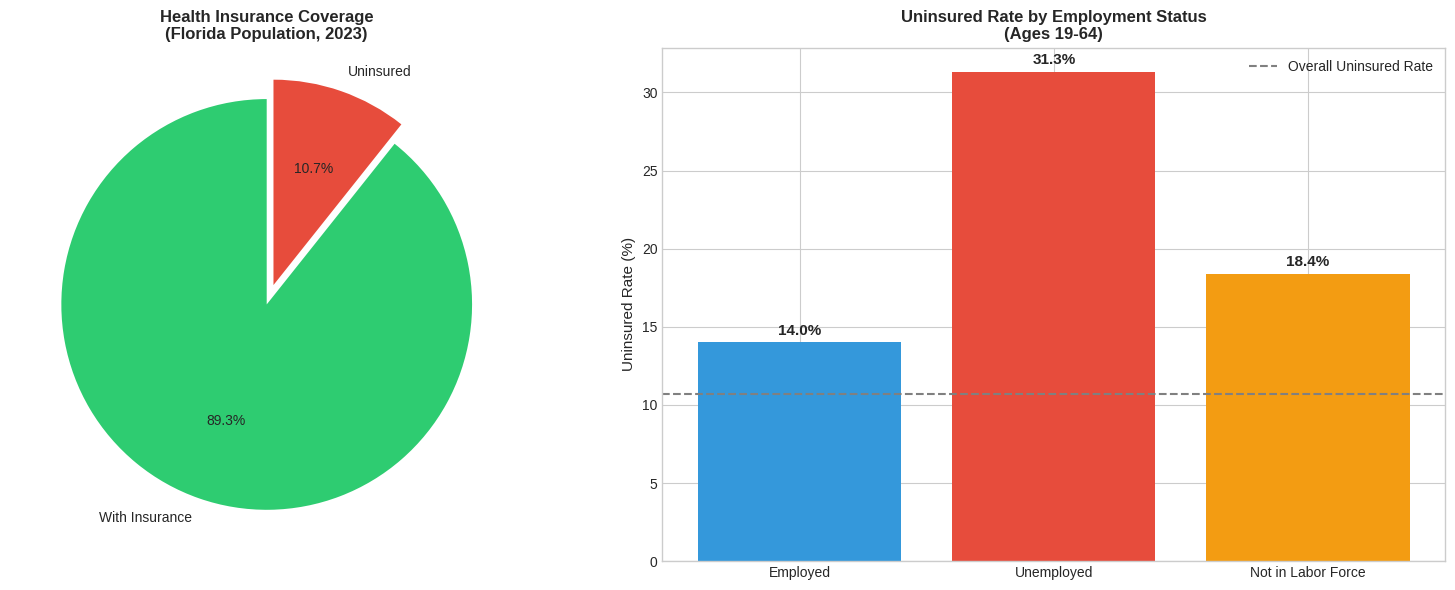


Uninsured population: ~2.38 million Floridians lack health insurance.
Unemployed workers are 2.2x more likely to be uninsured than employed workers.


In [ ]:
# Health Insurance Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Overall Insurance Coverage
coverage_data = {
    'Private Insurance Only': 26.7,
    'Public Coverage Only': 25.1,
    'Both Private & Public': 37.5,
    'Uninsured': 10.7
}

# Simplified view
simple_coverage = {
    'With Insurance': 89.3,
    'Uninsured': 10.7
}

colors = ['#2ecc71', '#e74c3c']
axes[0].pie(simple_coverage.values(), labels=simple_coverage.keys(), autopct='%1.1f%%',
            colors=colors, startangle=90, explode=(0, 0.1))
axes[0].set_title('Health Insurance Coverage\n(Florida Population, 2023)', fontsize=12, fontweight='bold')

# Uninsured Rate by Employment Status
uninsured_by_employment = {
    'Employed': 14.0,
    'Unemployed': 31.3,
    'Not in Labor Force': 18.4
}

categories = list(uninsured_by_employment.keys())
rates = list(uninsured_by_employment.values())

colors2 = ['#3498db', '#e74c3c', '#f39c12']
bars = axes[1].bar(categories, rates, color=colors2)
axes[1].set_ylabel('Uninsured Rate (%)', fontsize=11)
axes[1].set_title('Uninsured Rate by Employment Status\n(Ages 19-64)', fontsize=12, fontweight='bold')
axes[1].axhline(y=10.7, color='gray', linestyle='--', label='Overall Uninsured Rate')
axes[1].legend()

# Add value labels
for bar, rate in zip(bars, rates):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                 f'{rate}%', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('health_insurance.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nUninsured population: ~2.38 million Floridians lack health insurance.")
print("Unemployed workers are 2.2x more likely to be uninsured than employed workers.")

## 10. Industry and Occupation Analysis

In [ ]:
# Industry Distribution
print("=" * 80)
print("INDUSTRY DISTRIBUTION - FLORIDA 2023")
print("=" * 80)

industry_data = {
    'Educational/Healthcare/Social': 20.7,
    'Professional/Scientific/Management': 14.4,
    'Retail Trade': 11.6,
    'Arts/Entertainment/Food Services': 11.1,
    'Finance/Insurance/Real Estate': 8.4,
    'Construction': 8.1,
    'Transportation/Warehousing/Utilities': 6.5,
    'Manufacturing': 5.4,
    'Other Services': 5.2,
    'Public Administration': 4.0,
    'Wholesale Trade': 2.2,
    'Information': 1.5,
    'Agriculture/Mining': 0.9
}

print("\nEmployment by Industry Sector:")
for industry, pct in industry_data.items():
    workers = int(10731195 * pct / 100)
    print(f"  {industry}: {pct}% ({workers:,} workers)")

INDUSTRY DISTRIBUTION - FLORIDA 2023

Employment by Industry Sector:
  Educational/Healthcare/Social: 20.7% (2,221,357 workers)
  Professional/Scientific/Management: 14.4% (1,545,292 workers)
  Retail Trade: 11.6% (1,244,818 workers)
  Arts/Entertainment/Food Services: 11.1% (1,191,162 workers)
  Finance/Insurance/Real Estate: 8.4% (901,420 workers)
  Construction: 8.1% (869,226 workers)
  Transportation/Warehousing/Utilities: 6.5% (697,527 workers)
  Manufacturing: 5.4% (579,484 workers)
  Other Services: 5.2% (558,022 workers)
  Public Administration: 4.0% (429,247 workers)
  Wholesale Trade: 2.2% (236,086 workers)
  Information: 1.5% (160,967 workers)
  Agriculture/Mining: 0.9% (96,580 workers)


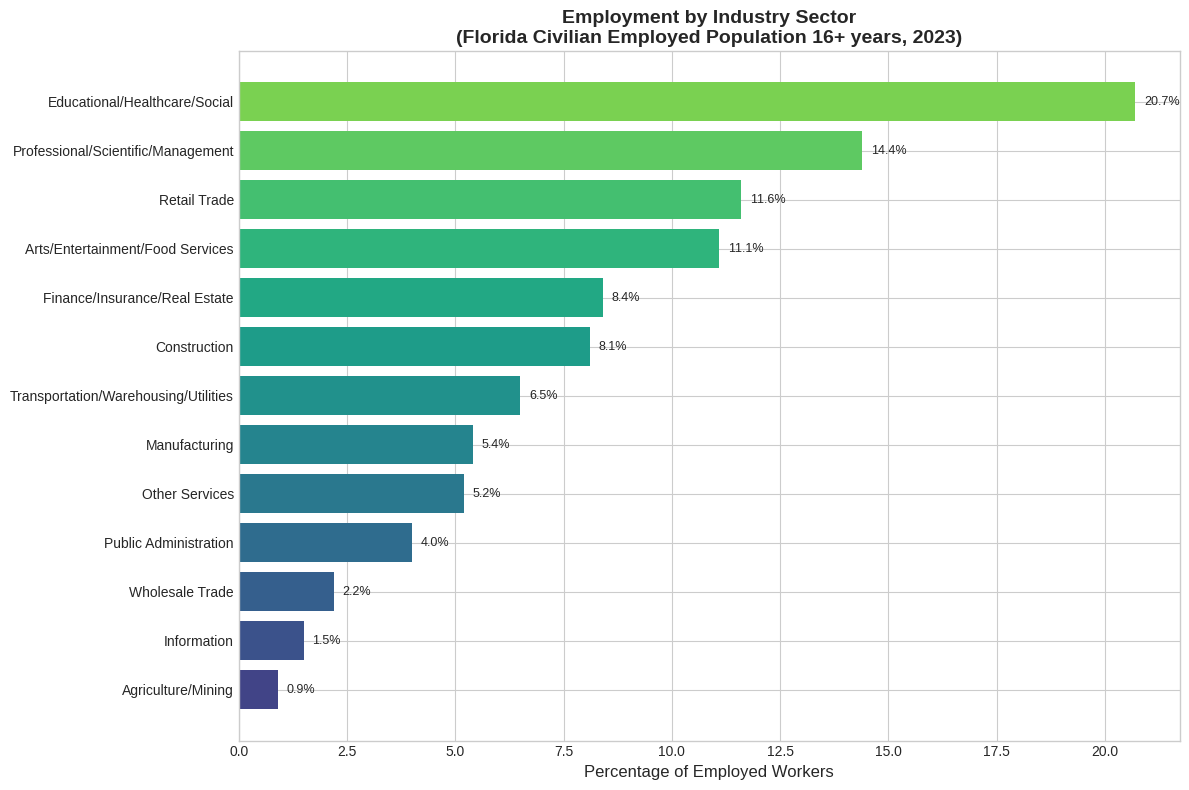


Top Industries (likely transit commuters):
  - Retail, Food Services, and Healthcare workers often have shift schedules
  - These workers may benefit most from extended transit hours


In [ ]:
# Industry Visualization
fig, ax = plt.subplots(figsize=(12, 8))

industries = list(industry_data.keys())
percentages = list(industry_data.values())

# Sort by percentage
sorted_indices = np.argsort(percentages)
industries = [industries[i] for i in sorted_indices]
percentages = [percentages[i] for i in sorted_indices]

colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(industries)))
bars = ax.barh(industries, percentages, color=colors)

ax.set_xlabel('Percentage of Employed Workers', fontsize=12)
ax.set_title('Employment by Industry Sector\n(Florida Civilian Employed Population 16+ years, 2023)',
             fontsize=14, fontweight='bold')

# Add value labels
for bar, pct in zip(bars, percentages):
    ax.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2,
             f'{pct}%', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('industry_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nTop Industries (likely transit commuters):")
print("  - Retail, Food Services, and Healthcare workers often have shift schedules")
print("  - These workers may benefit most from extended transit hours")

In [ ]:
# Occupation Distribution
print("\n" + "=" * 80)
print("OCCUPATION DISTRIBUTION - FLORIDA 2023")
print("=" * 80)

occupation_data = {
    'Management/Business/Science/Arts': 40.6,
    'Sales and Office': 21.8,
    'Service Occupations': 18.2,
    'Production/Transportation/Material Moving': 10.8,
    'Natural Resources/Construction/Maintenance': 8.7
}

print("\nEmployment by Occupation Category:")
for occupation, pct in occupation_data.items():
    workers = int(10731195 * pct / 100)
    print(f"  {occupation}: {pct}% ({workers:,} workers)")


OCCUPATION DISTRIBUTION - FLORIDA 2023

Employment by Occupation Category:
  Management/Business/Science/Arts: 40.6% (4,356,865 workers)
  Sales and Office: 21.8% (2,339,400 workers)
  Service Occupations: 18.2% (1,953,077 workers)
  Production/Transportation/Material Moving: 10.8% (1,158,969 workers)
  Natural Resources/Construction/Maintenance: 8.7% (933,613 workers)


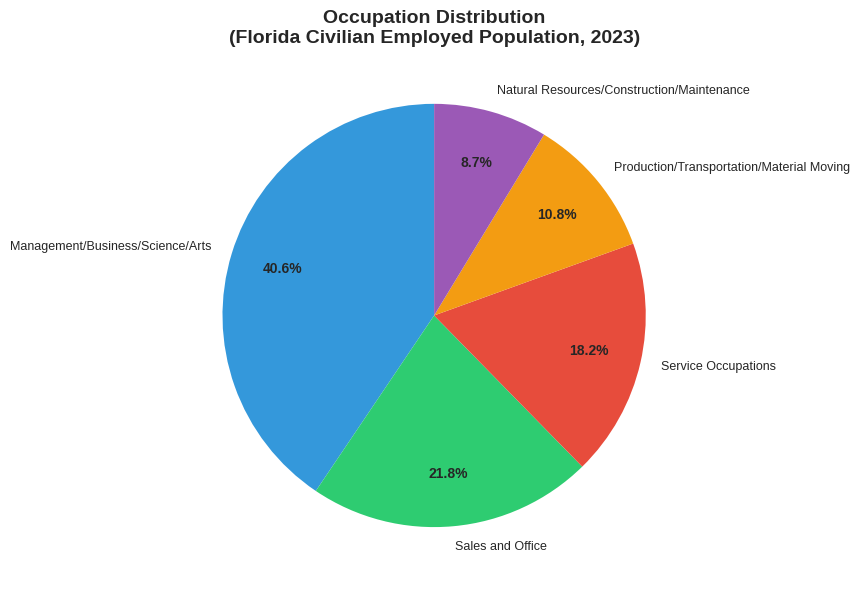


Service and Production workers (29%) are most likely to be transit-dependent.


In [ ]:
# Occupation Visualization
fig, ax = plt.subplots(figsize=(10, 6))

occupations = list(occupation_data.keys())
percentages = list(occupation_data.values())

colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6']
wedges, texts, autotexts = ax.pie(percentages, labels=occupations, autopct='%1.1f%%',
                                   colors=colors, startangle=90, pctdistance=0.75)

# Make labels more readable
for text in texts:
    text.set_fontsize(9)
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')

ax.set_title('Occupation Distribution\n(Florida Civilian Employed Population, 2023)',
             fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('occupation_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nService and Production workers (29%) are most likely to be transit-dependent.")

## 11. Earnings Gap Analysis

In [ ]:
# Earnings Analysis
print("=" * 80)
print("EARNINGS ANALYSIS - FLORIDA 2023")
print("=" * 80)

earnings_data = {
    'Median Earnings (All Workers)': 41459,
    'Median Earnings (Male Full-Time)': 56557,
    'Median Earnings (Female Full-Time)': 48034,
    'Mean Earnings (Households with Earnings)': 104490
}

print("\nEarnings Statistics:")
for metric, value in earnings_data.items():
    print(f"  {metric}: ${value:,}")

# Gender wage gap
wage_gap = (56557 - 48034) / 56557 * 100
print(f"\nGender Wage Gap: {wage_gap:.1f}%")
print(f"Women earn ${56557 - 48034:,} less per year than men (full-time workers)")

EARNINGS ANALYSIS - FLORIDA 2023

Earnings Statistics:
  Median Earnings (All Workers): $41,459
  Median Earnings (Male Full-Time): $56,557
  Median Earnings (Female Full-Time): $48,034
  Mean Earnings (Households with Earnings): $104,490

Gender Wage Gap: 15.1%
Women earn $8,523 less per year than men (full-time workers)


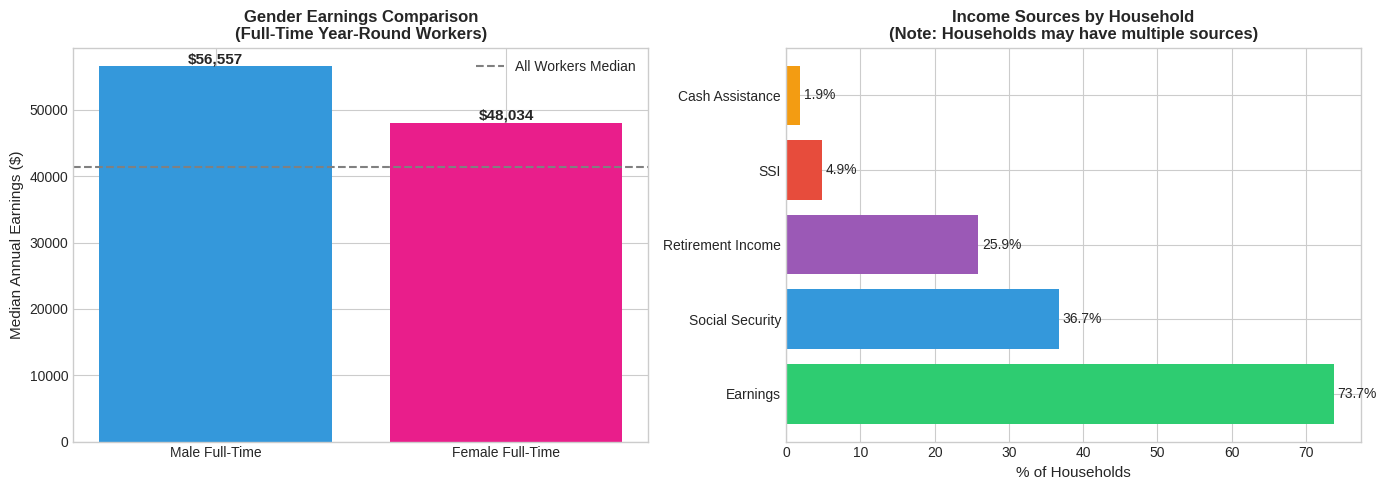

In [ ]:
# Earnings Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gender Earnings Comparison
genders = ['Male Full-Time', 'Female Full-Time']
earnings = [56557, 48034]
colors = ['#3498db', '#e91e8b']

bars = axes[0].bar(genders, earnings, color=colors)
axes[0].set_ylabel('Median Annual Earnings ($)', fontsize=11)
axes[0].set_title('Gender Earnings Comparison\n(Full-Time Year-Round Workers)', fontsize=12, fontweight='bold')
axes[0].axhline(y=41459, color='gray', linestyle='--', label='All Workers Median')
axes[0].legend()

# Add value labels
for bar, val in zip(bars, earnings):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500,
                 f'${val:,}', ha='center', fontsize=11, fontweight='bold')

# Income Types Distribution
income_types = {
    'Earnings': 73.7,
    'Social Security': 36.7,
    'Retirement Income': 25.9,
    'SSI': 4.9,
    'Cash Assistance': 1.9
}

types = list(income_types.keys())
pcts = list(income_types.values())

colors2 = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c', '#f39c12']
bars2 = axes[1].barh(types, pcts, color=colors2)
axes[1].set_xlabel('% of Households', fontsize=11)
axes[1].set_title('Income Sources by Household\n(Note: Households may have multiple sources)', fontsize=12, fontweight='bold')

# Add value labels
for bar, pct in zip(bars2, pcts):
    axes[1].text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                 f'{pct}%', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('earnings_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

## 12. Transit Equity Composite Analysis

In [ ]:
# Create a Transit Equity Dashboard
print("=" * 80)
print("TRANSIT EQUITY COMPOSITE ANALYSIS - FLORIDA 2023")
print("=" * 80)

# Calculate key equity indicators
equity_indicators = {
    'Public Transit Users': {
        'value': 1.4,
        'count': 143998,
        'description': 'Workers using public transportation'
    },
    'Low-Income Households (<$35K)': {
        'value': 22.5,
        'count': int(8966402 * 0.225),
        'description': 'Households likely transit-dependent'
    },
    'Poverty Rate': {
        'value': 12.3,
        'count': int(22276397 * 0.123),
        'description': 'People below poverty level'
    },
    'SNAP Recipients': {
        'value': 11.9,
        'count': 1066130,
        'description': 'Households receiving food assistance'
    },
    'Female HH w/ Children in Poverty': {
        'value': 28.1,
        'count': 'N/A',
        'description': 'High-need, often car-less households'
    },
    'Uninsured Workers': {
        'value': 14.0,
        'count': int(9705397 * 0.14),
        'description': 'Employed but lacking health insurance'
    },
    'Service/Production Workers': {
        'value': 29.0,
        'count': int(10731195 * 0.29),
        'description': 'Workers with irregular schedules'
    }
}

print("\nKey Transit Equity Indicators:")
print("-" * 80)
for indicator, data in equity_indicators.items():
    if data['count'] != 'N/A':
        print(f"\n{indicator}:")
        print(f"  Rate: {data['value']}% | Count: {data['count']:,}")
        print(f"  Context: {data['description']}")
    else:
        print(f"\n{indicator}:")
        print(f"  Rate: {data['value']}%")
        print(f"  Context: {data['description']}")

TRANSIT EQUITY COMPOSITE ANALYSIS - FLORIDA 2023

Key Transit Equity Indicators:
--------------------------------------------------------------------------------

Public Transit Users:
  Rate: 1.4% | Count: 143,998
  Context: Workers using public transportation

Low-Income Households (<$35K):
  Rate: 22.5% | Count: 2,017,440
  Context: Households likely transit-dependent

Poverty Rate:
  Rate: 12.3% | Count: 2,739,996
  Context: People below poverty level

SNAP Recipients:
  Rate: 11.9% | Count: 1,066,130
  Context: Households receiving food assistance

Female HH w/ Children in Poverty:
  Rate: 28.1%
  Context: High-need, often car-less households

Uninsured Workers:
  Rate: 14.0% | Count: 1,358,755
  Context: Employed but lacking health insurance

Service/Production Workers:
  Rate: 29.0% | Count: 3,112,046
  Context: Workers with irregular schedules


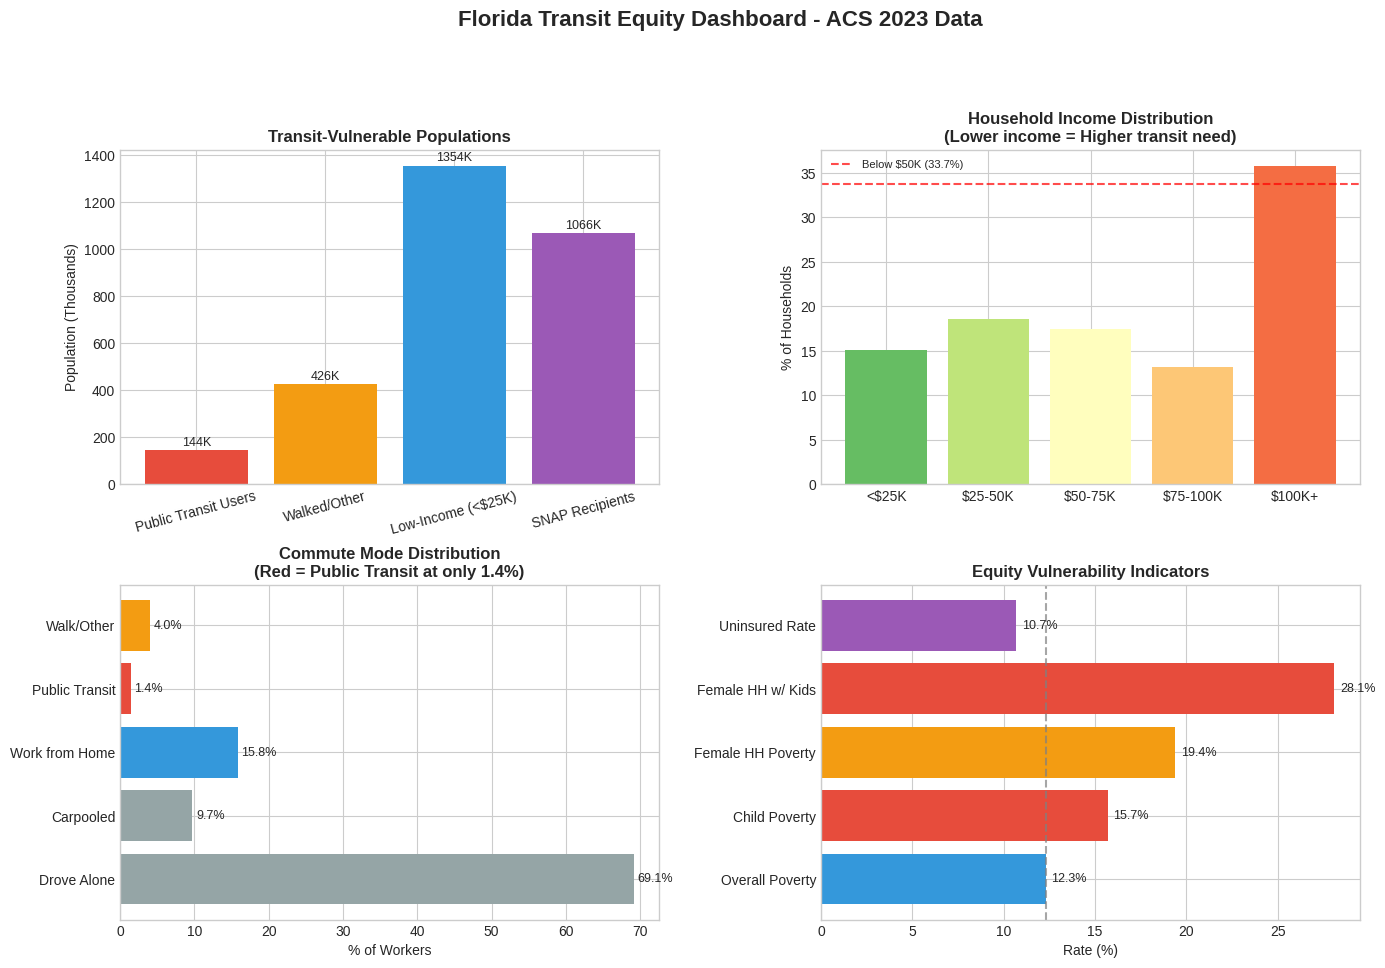

In [ ]:
# Transit Equity Dashboard Visualization
fig = plt.figure(figsize=(16, 10))

# Create a 2x2 grid
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# 1. Transit-Dependent Population Estimate
ax1 = fig.add_subplot(gs[0, 0])
transit_dependent = {
    'Public Transit Users': 143998,
    'Walked/Other': 425855,
    'Low-Income (<$25K)': int(8966402 * 0.151),
    'SNAP Recipients': 1066130
}
categories = list(transit_dependent.keys())
counts = [v/1000 for v in transit_dependent.values()]  # Convert to thousands

colors = ['#e74c3c', '#f39c12', '#3498db', '#9b59b6']
bars = ax1.bar(categories, counts, color=colors)
ax1.set_ylabel('Population (Thousands)', fontsize=10)
ax1.set_title('Transit-Vulnerable Populations', fontsize=12, fontweight='bold')
ax1.tick_params(axis='x', rotation=15)
for bar, count in zip(bars, counts):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20,
             f'{count:.0f}K', ha='center', fontsize=9)

# 2. Income vs Transportation Need
ax2 = fig.add_subplot(gs[0, 1])
income_levels = ['<$25K', '$25-50K', '$50-75K', '$75-100K', '$100K+']
income_pcts = [15.1, 18.6, 17.4, 13.2, 35.8]
transit_need = [5, 4, 3, 2, 1]  # Relative transit need score (higher = more need)

colors2 = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(income_levels)))
bars2 = ax2.bar(income_levels, income_pcts, color=colors2)
ax2.set_ylabel('% of Households', fontsize=10)
ax2.set_title('Household Income Distribution\n(Lower income = Higher transit need)', fontsize=12, fontweight='bold')
ax2.axhline(y=33.7, color='red', linestyle='--', alpha=0.7, label='Below $50K (33.7%)')
ax2.legend(fontsize=8)

# 3. Commute Mode - Transit Gap
ax3 = fig.add_subplot(gs[1, 0])
modes = ['Drove Alone', 'Carpooled', 'Work from Home', 'Public Transit', 'Walk/Other']
mode_pcts = [69.1, 9.7, 15.8, 1.4, 4.0]

colors3 = ['#95a5a6', '#95a5a6', '#3498db', '#e74c3c', '#f39c12']
bars3 = ax3.barh(modes, mode_pcts, color=colors3)
ax3.set_xlabel('% of Workers', fontsize=10)
ax3.set_title('Commute Mode Distribution\n(Red = Public Transit at only 1.4%)', fontsize=12, fontweight='bold')
for bar, pct in zip(bars3, mode_pcts):
    ax3.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{pct}%', va='center', fontsize=9)

# 4. Poverty and Equity Summary
ax4 = fig.add_subplot(gs[1, 1])
equity_summary = {
    'Overall Poverty': 12.3,
    'Child Poverty': 15.7,
    'Female HH Poverty': 19.4,
    'Female HH w/ Kids': 28.1,
    'Uninsured Rate': 10.7
}

categories = list(equity_summary.keys())
rates = list(equity_summary.values())

colors4 = ['#3498db', '#e74c3c', '#f39c12', '#e74c3c', '#9b59b6']
bars4 = ax4.barh(categories, rates, color=colors4)
ax4.set_xlabel('Rate (%)', fontsize=10)
ax4.set_title('Equity Vulnerability Indicators', fontsize=12, fontweight='bold')
ax4.axvline(x=12.3, color='gray', linestyle='--', alpha=0.7)
for bar, rate in zip(bars4, rates):
    ax4.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2,
             f'{rate}%', va='center', fontsize=9)

plt.suptitle('Florida Transit Equity Dashboard - ACS 2023 Data', fontsize=16, fontweight='bold', y=1.02)
plt.savefig('transit_equity_dashboard.png', dpi=150, bbox_inches='tight')
plt.show()

## 13. Data Quality Assessment

In [ ]:
# Data Quality Report
print("=" * 80)
print("DATA QUALITY ASSESSMENT")
print("=" * 80)

# Completeness
total_cells = df_clean.shape[0] * df_clean.shape[1]
missing_cells = df_clean.isna().sum().sum()
completeness = (1 - missing_cells / total_cells) * 100

print(f"\n1. COMPLETENESS")
print(f"   Total cells: {total_cells:,}")
print(f"   Missing cells: {missing_cells:,}")
print(f"   Completeness rate: {completeness:.1f}%")

# Missing by column
print(f"\n2. MISSING VALUES BY COLUMN")
missing_by_col = df_clean.isna().sum().sort_values(ascending=False)
for col, count in missing_by_col.items():
    if count > 0:
        pct = count / len(df_clean) * 100
        print(f"   {col}: {count} ({pct:.1f}%)")

# Data types
print(f"\n3. DATA TYPES")
for col, dtype in df_clean.dtypes.items():
    print(f"   {col}: {dtype}")

# Margin of Error analysis
print(f"\n4. MARGIN OF ERROR ANALYSIS")
moe_values = df_clean['MOE_Num'].dropna()
if len(moe_values) > 0:
    print(f"   Mean MOE: ±{moe_values.mean():,.0f}")
    print(f"   Median MOE: ±{moe_values.median():,.0f}")
    print(f"   Max MOE: ±{moe_values.max():,.0f}")
    print(f"   Min MOE: ±{moe_values.min():,.0f}")

DATA QUALITY ASSESSMENT

1. COMPLETENESS
   Total cells: 1,740
   Missing cells: 155
   Completeness rate: 91.1%

2. MISSING VALUES BY COLUMN
   Percent_MOE_Num: 43 (29.7%)
   Estimate_Num: 28 (19.3%)
   MOE_Num: 28 (19.3%)
   Percent_Num: 24 (16.6%)
   Percent_MOE: 8 (5.5%)
   Percent: 8 (5.5%)
   Margin_of_Error: 8 (5.5%)
   Estimate: 8 (5.5%)

3. DATA TYPES
   Label: object
   Estimate: object
   Margin_of_Error: object
   Percent: object
   Percent_MOE: object
   Indent_Level: int64
   Label_Clean: object
   Estimate_Num: float64
   MOE_Num: float64
   Percent_Num: float64
   Percent_MOE_Num: float64
   Category: object

4. MARGIN OF ERROR ANALYSIS
   Mean MOE: ±19,685
   Median MOE: ±17,717
   Max MOE: ±72,331
   Min MOE: ±0


In [ ]:
# Create Data Dictionary
print("\n" + "=" * 80)
print("DATA DICTIONARY")
print("=" * 80)

data_dict = pd.DataFrame({
    'Column': df_clean.columns,
    'Data Type': df_clean.dtypes.values,
    'Non-Null Count': df_clean.count().values,
    'Null Count': df_clean.isna().sum().values,
    'Sample Value': [df_clean[col].dropna().iloc[0] if df_clean[col].dropna().shape[0] > 0 else 'N/A' for col in df_clean.columns]
})

display(data_dict)


DATA DICTIONARY


,Column,Data Type,Non-Null Count,Null Count,Sample Value
0,Label,object,145,0,EMPLOYMENT STATUS
1,Estimate,object,137,8,"18,768,460"
2,Margin_of_Error,object,137,8,"±9,654"
3,Percent,object,137,8,"18,768,460"
4,Percent_MOE,object,137,8,(X)
5,Indent_Level,int64,145,0,0
6,Label_Clean,object,145,0,EMPLOYMENT STATUS
7,Estimate_Num,float64,117,28,18768460.0
8,MOE_Num,float64,117,28,9654.0
9,Percent_Num,float64,121,24,18768460.0


## 14. Key Findings Summary

In [ ]:
print("=" * 80)
print("KEY FINDINGS SUMMARY - ACS DP03 FLORIDA 2023")
print("=" * 80)

findings = """
1. EMPLOYMENT & LABOR FORCE
   - 18.77 million people aged 16+ in Florida
   - 60% labor force participation rate
   - 4.1% unemployment rate
   - 10.73 million employed workers

2. COMMUTING (CRITICAL FOR TRANSIT EQUITY)
   - Only 1.4% use public transit (~144,000 workers)
   - 69.1% drive alone (highest mode)
   - 15.8% work from home
   - Mean commute time: 28.5 minutes

3. INCOME DISTRIBUTION
   - Median household income: $73,311
   - 22.5% of households earn less than $35,000
   - 35.8% earn over $100,000
   - Significant income inequality present

4. POVERTY & VULNERABILITY
   - 12.3% overall poverty rate (~2.74 million people)
   - 15.7% child poverty rate
   - 28.1% poverty for female-headed households with children
   - 11.9% receive SNAP benefits (~1.07 million households)

5. HEALTH INSURANCE
   - 10.7% uninsured (~2.38 million people)
   - Unemployed workers: 31.3% uninsured
   - Employed workers: 14.0% uninsured

6. INDUSTRY COMPOSITION
   - Top sectors: Education/Healthcare (20.7%), Professional Services (14.4%)
   - Retail and Food Services (22.7% combined) - shift workers
   - Service/Production workers (29%) most likely transit-dependent
"""

print(findings)

KEY FINDINGS SUMMARY - ACS DP03 FLORIDA 2023

1. EMPLOYMENT & LABOR FORCE
   - 18.77 million people aged 16+ in Florida
   - 60% labor force participation rate
   - 4.1% unemployment rate
   - 10.73 million employed workers

2. COMMUTING (CRITICAL FOR TRANSIT EQUITY)
   - Only 1.4% use public transit (~144,000 workers)
   - 69.1% drive alone (highest mode)
   - 15.8% work from home
   - Mean commute time: 28.5 minutes

3. INCOME DISTRIBUTION
   - Median household income: $73,311
   - 22.5% of households earn less than $35,000
   - 35.8% earn over $100,000
   - Significant income inequality present

4. POVERTY & VULNERABILITY
   - 12.3% overall poverty rate (~2.74 million people)
   - 15.7% child poverty rate
   - 28.1% poverty for female-headed households with children
   - 11.9% receive SNAP benefits (~1.07 million households)

5. HEALTH INSURANCE
   - 10.7% uninsured (~2.38 million people)
   - Unemployed workers: 31.3% uninsured
   - Employed workers: 14.0% uninsured

6. INDUSTRY CO

In [ ]:
print("\n" + "=" * 80)
print("TRANSIT EQUITY RECOMMENDATIONS")
print("=" * 80)

recommendations = """
BASED ON ACS DATA ANALYSIS, KEY RECOMMENDATIONS FOR EQUITABLE TRANSIT:

1. TARGET LOW-INCOME AREAS
   - Focus transit improvements in areas with high concentrations of:
     * Households earning <$35K (22.5% of all households)
     * SNAP recipients (11.9%)
     * Female-headed households with children (28.1% poverty rate)

2. EXTEND SERVICE HOURS
   - Retail, food service, and healthcare workers (32.8%) often work
     non-traditional hours and need early morning/late night service

3. IMPROVE FIRST/LAST MILE CONNECTIONS
   - With only 1.4% using transit, barriers to access likely exist
   - Consider feeder services, bike-share, and pedestrian improvements

4. CONSIDER FARE EQUITY PROGRAMS
   - 12.3% poverty rate suggests need for reduced-fare programs
   - Partner with SNAP program for automatic eligibility

5. ADDRESS EMPLOYMENT CENTERS
   - Education/Healthcare sector (20.7%) = hospitals, schools
   - Ensure robust transit to these major employment centers

6. REDUCE COMMUTE BURDEN
   - 28.5 minute average commute time
   - Transit should be competitive with driving for time-efficiency
"""

print(recommendations)


TRANSIT EQUITY RECOMMENDATIONS

BASED ON ACS DATA ANALYSIS, KEY RECOMMENDATIONS FOR EQUITABLE TRANSIT:

1. TARGET LOW-INCOME AREAS
   - Focus transit improvements in areas with high concentrations of:
     * Households earning <$35K (22.5% of all households)
     * SNAP recipients (11.9%)
     * Female-headed households with children (28.1% poverty rate)

2. EXTEND SERVICE HOURS
   - Retail, food service, and healthcare workers (32.8%) often work
     non-traditional hours and need early morning/late night service

3. IMPROVE FIRST/LAST MILE CONNECTIONS
   - With only 1.4% using transit, barriers to access likely exist
   - Consider feeder services, bike-share, and pedestrian improvements

4. CONSIDER FARE EQUITY PROGRAMS
   - 12.3% poverty rate suggests need for reduced-fare programs
   - Partner with SNAP program for automatic eligibility

5. ADDRESS EMPLOYMENT CENTERS
   - Education/Healthcare sector (20.7%) = hospitals, schools
   - Ensure robust transit to these major employment 

## 15. Export Cleaned Data

In [ ]:
from google.colab.files import download
# Export cleaned dataset
output_path = 'ACS_DP03_Florida_2023_Cleaned.csv'
df_clean.to_csv(output_path, index=False)
print(f"Cleaned data exported to: {output_path}")

# Export summary statistics
summary_stats = {
    'Metric': [
        'Total Population 16+',
        'Labor Force Participation Rate',
        'Unemployment Rate',
        'Public Transit Commuters',
        'Mean Commute Time (minutes)',
        'Median Household Income',
        'Poverty Rate',
        'SNAP Recipients (%)',
        'Uninsured Rate'
    ],
    'Value': [
        '18,768,460',
        '60.0%',
        '4.1%',
        '143,998 (1.4%)',
        '28.5',
        '$73,311',
        '12.3%',
        '11.9%',
        '10.7%'
    ],
    'Transit_Equity_Relevance': [
        'Working-age population base',
        'Indicates workforce mobility needs',
        'Job seekers need transit access',
        'CRITICAL - Very low transit usage',
        'Transit competitiveness benchmark',
        'Affordability indicator',
        'High-need population identification',
        'Proxy for transit-dependent population',
        'Vulnerable population indicator'
    ]
}

summary_df = pd.DataFrame(summary_stats)
summary_df.to_csv('ACS_Transit_Equity_Summary.csv', index=False)
print(f"Summary statistics exported to: ACS_Transit_Equity_Summary.csv")
download('ACS_DP03_Florida_2023_Cleaned.csv')

display(summary_df)

Cleaned data exported to: ACS_DP03_Florida_2023_Cleaned.csv
Summary statistics exported to: ACS_Transit_Equity_Summary.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Metric,Value,Transit_Equity_Relevance
0,Total Population 16+,"18,768,460",Working-age population base
1,Labor Force Participation Rate,60.0%,Indicates workforce mobility needs
2,Unemployment Rate,4.1%,Job seekers need transit access
3,Public Transit Commuters,"143,998 (1.4%)",CRITICAL - Very low transit usage
4,Mean Commute Time (minutes),28.5,Transit competitiveness benchmark
5,Median Household Income,"$73,311",Affordability indicator
6,Poverty Rate,12.3%,High-need population identification
7,SNAP Recipients (%),11.9%,Proxy for transit-dependent population
8,Uninsured Rate,10.7%,Vulnerable population indicator


---

## Notebook Complete

This EDA notebook has analyzed the US Census Bureau's American Community Survey (ACS) DP03 data for Florida 2023, focusing on metrics relevant to **transit equity**.

### Key Outputs:
1. **Cleaned dataset** (`ACS_DP03_Florida_2023_Cleaned.csv`)
2. **Summary statistics** (`ACS_Transit_Equity_Summary.csv`)
3. **Visualizations** (saved as PNG files)
4. **Transit equity indicators and recommendations**

### Next Steps:
- Integrate with National Accessibility Evaluation data
- Develop equity index combining ACS and accessibility metrics
- Create geographic overlays with census tract-level data
- Build predictive models for transit access gaps